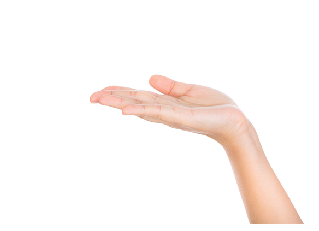

In [1]:
# 1. 이미지 출력하기
import cv2
from matplotlib import pyplot as plt
imageFile = './images/hand2.jpg'
imgBGR = cv2.imread(imageFile) 
plt.axis('off')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

In [2]:
# 2. 비디오 캡처와 화면 표시
import cv2
cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_type:', type(frame_size), 'frame_size=', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_type: <class 'tuple'> frame_size= (640, 480)


In [3]:
# 3. 흑백영상 접근
import cv2
img = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
print(img[100:110, 200:210]) # Roi 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x]=0

img[100:400, 200:300]=0 # ROI접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()


[[153 153 150 141 151 150 151 145 144 144]
 [146 144 151 155 148 149 146 148 145 145]
 [139 146 157 148 142 146 148 146 144 140]
 [145 153 146 135 139 147 149 148 140 138]
 [151 149 139 142 148 150 149 141 142 147]
 [151 144 143 151 152 150 139 138 145 144]
 [149 151 149 151 149 148 150 143 142 141]
 [159 149 145 146 150 151 152 144 132 137]
 [151 144 144 144 152 149 139 134 140 144]
 [142 142 151 151 143 142 133 143 146 136]]


In [4]:
# 4. 컬러 영상 접근
import cv2
img = cv2.imread('./images/lena.png')
img[100,200]=[255,0,0] # 컬러 BGR 접근
print(img[100, 200:210]) # ROI 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x] = [255,0,0] # 파란색으로 변경
img[100:400, 200:300]=[255,0,0] # ROI 접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

[[255   0   0]
 [109 117 213]
 [113 115 208]
 [114 101 199]
 [121 116 207]
 [105 114 209]
 [112 113 212]
 [107 109 204]
 [117 108 200]
 [110 109 202]]


In [5]:
# 5.마우스로 ROI 영역 지정 (드래그)
# roi = (206, 236, 71, 150)인데 -> roi[0]은 x열 roi[1]은 y행, roi[2]는 width, roi[3]은 height
import cv2
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src) # 마우스로 ROI 영역 지정 

print('roi=', roi)

# img에 roi영역 저장.
img = src[roi[1]:roi[1] + roi[3],
          roi[0]:roi[0] + roi[2]]

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

roi= (115, 147, 275, 270)


In [6]:
# 6. 영상 복사 copy와 참조 차이
import cv2
src = cv2.imread('./images/lena.png')

dst2 = src
dst = src.copy() # 복사

src[100:400, 200:300]=0

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# 7. 영상 크기 변환, 회전
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(src, dsize = (320,240)) # resize 가로 320 세로 240으로
dst2 = cv2.resize(src, dsize=(0,0), fx=1.5, fy=1.2) # resize 가로 1.5배 세로 1.2배

dst_rotate = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst_rotate2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imshow('dst1',dst) # 가로세로 고정크기
cv2.imshow('dst2',dst2) # 가로 배율로 늘리기
cv2.imshow('dst_roate',dst_rotate) # 회전 시계방향
cv2.imshow('dst_rotate2',dst_rotate2) # 회전 반시계
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 8. 영상 어파인 변환 (확대/축소, 회전)
import cv2
import numpy as np
src = cv2.imread('./images/lena.png')

rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5) # getRotataionMatrix2D( center, angle, scale) 
M2 = cv2.getRotationMatrix2D((rows/2, cols/2), -45, 1.0) 

dst1 = cv2.warpAffine(src, M1, (rows, cols)) # warpAffine( src, M, dsize) -> M은 변환행렬
dst2 = cv2.warpAffine(src, M2, (rows, cols))

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 9. 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=',ret)
cv2.imshow('dst',dst)

# thresh_otsu를 추가하면 임계값 thresh와 관계없이 otsu알고리즘으로 최적 임계값 계산 됨0
ret2, dst2 = cv2.threshold(src,200,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# 즉 여기선 주어진 임계값 200이 아닌 170이 threshold가 됨.
print("ret2=",ret2)
cv2.imshow('dst2',dst2)

cv2.waitKey()
cv2.destroyAllWindows()

ret= 120.0
ret2= 124.0


In [10]:
# 10. 적응형 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret,dst = cv2.threshold(src,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('dst',dst)

# 젤 괜찮은 방법1
dst2 = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',dst2)

# 젤 괜찮은방법2
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',dst3)

cv2.waitKey()
cv2.destroyAllWindows()

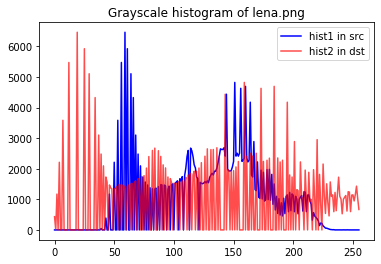

In [1]:
# 11. 그레이스케일 영상의 히스토그램 평활화
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('dst',dst)


plt.title('Grayscale histogram of lena.png')

hist1 = cv2.calcHist(images = [src], channels = [0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images = [dst], channels=[0], mask = None, histSize = [256], ranges=[0,256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
# 12. 컬러영상의 히스토그램 평활화
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('./images/lena.png')
cv2.imshow('src',src)

#1 hsv
# 1-1 색을 split로 분리하기
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 1-2 분리한 채널에서 v를 히스토그램 평활화 진행
v2 = cv2.equalizeHist(v)

# 1-3 분리하여 히스토그램 평활화 한 v2를 다시 합친다.
hsv2 = cv2.merge([h,s,v2])
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',dst)

# 2 yCrCb - 밝기값 채널인 y에 히스토그램 평활화 적용
# 2-1 색을 split로 분리하기
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(yCrCb)

# 2-2 분리한 채널에서 y를 히스토그램 평활화를 진행
y2 = cv2.equalizeHist(y)

# 2-3 분리하여 히스토그램 평활화 한 y2를 다시 합친다.
yCrCb2 = cv2.merge([y2, Cr, Cb])
dst2 = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 13. 역투영 - 정해진 임계치와 비슷한 영역만 검출하기
# 추적할 물체를 관심 영역으로 지정한 후에, 컬러 정보(hue)의 히스토그램을 계산하고, 추적할 때, 계산된 히스토그램을 비디오에 역투영하고
# 임계치를 적용하여 추적을 위한 영상과 컬러 정보가 비슷한 영역만을 검추랗ㄹ 수 있다. 
# 비디오 물체추적 방법은 meanShift, CamShift 함수에서 히스토그램 역투영을 사용한다.

import cv2
import numpy as np

img = cv2.imread("./images/hand2.jpg")
img = cv2.resize(img, dsize=(300,300))

# YCrCb 로 변환
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# 1-1 ycrcb 손모양만 검출
# 살색은 기본적으로 : Cr:133 ~ 173, Cb :"77~127
# YCrCb -> y는 휘도성분, Cb와 Cr은 색차 성분 -> 색차란 임의의 색과 그 색과 같은 휘도를 가진 기준색과의 측색적인 차이
# inRange함수는 특정색만 검출할 때 (0~255, 133~173. 77 ~ 127)
hand = cv2.inRange(img_ycrcb, np.array([0,133,77]), np.array([255,173,127]))

cv2.imshow("origin",img)
cv2.imshow("hand",hand)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 14 영상 잡음제거 및 부드럽게 블러 & 스무딩
# boxFilter(주변평균값필터), bilateralFilter(양방향), medianBlur, GaussianBlur 필터
# 필터는 또는 윈도우라고 부르는데, 3x3, 5x5, 7x7,11x11과 같이 홀수크기를 주로 사용.
import cv2
import numpy as np

src = cv2.imread('./images/lena.png')
dst1 = cv2.boxFilter(src, ddepth=-1, ksize=(11,11))  # ddepth -> 출력화소의 구조 -1이면 src와 똑같
dst2 = cv2.boxFilter(src, ddepth=-1, ksize=(21,21)) # ddepth -> 출력화소의 구조 -1이면 src와 똑같

dst3 = cv2.bilateralFilter(src, d=11, sigmaColor=10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src, d=-1, sigmaColor=10, sigmaSpace=10)

# box형 필터
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)

# 양방향 필터
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
# 15 미디안 필터, 블러, 가우시안 필터
import cv2
import numpy as np

src = cv2.imread('./images/lena.png')
dst1 = cv2.medianBlur(src, ksize=7)
dst2 = cv2.blur(src, ksize=(7,7))
dst3 = cv2.GaussianBlur(src, ksize=(7,7), sigmaX = 0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7,7), sigmaX = 10.0)

cv2.imshow('medianblur',dst1) # medainblur
cv2.imshow('blur',dst2)
cv2.imshow('gaussianblur_sigmaX=0',dst3)
cv2.imshow('gaussianblur_sigmaX=10.0',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# 16. 미분필터 - Sobel 필터
# ksize=3 에서의 1차 필터
#  -1  0  1    -1 -2 -1         1  0  -1
#  -2  0  2     0  0  0         0  0  0
#  -1  0  1     1  2  1        -1  0  1
#  dx=1, dy=0  / dx=0 dy=1  / dx=1, dy=1

# ksize=3에서 2차 미분 필터
#  1  -2  1    1  2  1      1  -2  1
#  2  -4  2   -2 -4  -2    -2  4  -2
#  1  2  1    1   2  1     1  -2  1
#  dx=2, dy=0  / dx=0 dy=0  / dx=2 dy=2

import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)

#1 - Sobel함수 계산
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3) # x에게로 1차 편미분
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3) # y에게로 1차 편미분

#2 - 세로잘나오게
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3 - 가로 잘나오게
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

#4 - 가로세로 둘다 잘나오게
mag = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',src)
cv2.imshow('dstX',dstX) # 세로선 더 잘잡음 (행)
cv2.imshow('dstY',dstY) # 가로선 더 잘잡음 (열)
cv2.imshow('dstM',dstM) # 
cv2.waitKey()
cv2.destroyAllWindows()

mag: 0.0 672.8714599609375 (0, 0) (118, 274)


In [7]:
# 17. Laplacian 필터
import cv2
import numpy as np

#1 원본, 블러처리 두개 만들기
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7,7), sigmaX=0.0)
cv2.imshow('src', src)
cv2.imshow('blur', blur)

# 2 블러처리 안한 영상에 Laplacian
lap = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0,255,cv2.NORM_MINMAX)
cv2.imshow('lap',lap)
cv2.imshow('dst', dst)

#3 블러처리한 영상에 Laplacian
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2', lap2)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

# 결론 - blur 처리한게 더 엣지를 잘 검출해냄. (흔히 미분 오차를 줄이기 위해서 blur를 한다고 함)

lap: -199.0 168.0 (70, 414) (212, 299)
lap2: -34.0 26.0 (180, 435) (163, 409)


In [8]:
# 18. filter2D()와 sepFilter2D() 에 의한 엣지 검출
# 앵커점은 필터의 기준이 되는 중심점으로 필터 크기가 3x3이면 anchor = Point(1,1)이고, 필터 크기가 5x5이면 anchor=Point(2,2) 이다.
# OpenCV는 cv2.filter2D()와 cv2.sepFilter2D()로 함수에 적용 가능하다.
# filter2D(src, ddepth, kernel) 입력 src에 윈도우 kernel을 이용하여 회선을 계산하여 dst에 저장한다.
# sepFilter2D(src, ddepth, kernelX, kernelY) kernelX 적용한 결과의 각 열에 커널 kernelY 적용하여 필터링
# ddepth는 dst의 화소 깊이로 ddepth=-1이면 입력과 같은 화소 깊이
# kernel은 1-채널 실수 배열로 src의 모든 채널에 동일하게 적용된다. anchor는 커널의 중심점으로 kernel내의 위치

import cv2
import numpy as np

src= cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)

#1 미분선형 필터 kx, ky 생성후 
kx, ky = cv2.getDerivKernels(1,0,ksize=3) # 커널 생성
sobelX = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gy = cv2.filter2D(src, cv2.CV_32F, sobelX)
## gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3) # 커널 생성
sobelY = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)
## gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

# 3 
mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [9]:
# 19 모폴로지 연산
# 침식(erode), 팽창(diate), 열기 (open), 닫기(closing)
# getStructuringElement() , erode(), dilate(), morphologyEx 등
# getStructuringElement() 함수는 모폴로지 연산에 사용하는 MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS 모양의 ksize 크기 구조요소 반환

import cv2
import numpy as np

src = cv2.imread('./images/morphology.png', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize =(3,3))
closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE ,kernel, iterations =5)
opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations=5)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)

tophat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations = 5)
balckhat = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernel, iterations = 5)

cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('balckhat', balckhat)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# 20 템플릿 매칭
# 템플릿 매칭은 물체 인식, 스테레오 영상에서 대응점 검출등에 사용될 수 있다. 
# 템플릿 매칭은 이동(translation) 문제는 해결할 수 있지만, 회전 및 스케일링된 물체에 대한 매칭은 여러 개의 템플릿을 이용할수있으나 어려움
# 에지, 코너점, 주파수 변환등의 특징 공간으로 변환하여 템프릿 매칭을 수행할 수도 있으며, 영상의 밝기 등에 덜 민감하도록 정규화 과정 필요
# 매칭 방법은 상관관계(correlatin), SAD(Sum of absolute differences) 등을 사용한다.
# method = cv2.TM_SQDIFF - 템플릿 T를 탐색영역 I에서 이동시켜가며 차이의 제곱합계를 계산한다.
# method = cv2.TM_SQDIFF_NORMED - R(sqdiff)을 D로 나누어 정규화한다.
# method = cv2.TM_CCORR - 템플릿 T를 탐색영역 I에서 이도이켜가며 곱의 한계를 계산한다.
# method = cv2.TM_CCORR_NORMED - R(ccorr)을 D로 나누어 정규화한다.
# method = cv2.TM_CCOEFF - T은 템플릿 T의 각 요소값에서 평균을 뺄셈한 변환 템플릿이며 각 평균값으로 보정하여 비교함. 매칭되는 위치에서 큰 값을 가짐
# method = cv2.TM_CCOEFF_NORMED - R(ccoeff)을 D로 나누어 정규화한다.
import cv2
import numpy as np

src = cv2.imread('./images/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A = cv2.imread('./images/a.bmp', cv2.IMREAD_GRAYSCALE)
tmp_B = cv2.imread('./images/b.png', cv2.IMREAD_GRAYSCALE)
tmp_D = cv2.imread('./images/d.png', cv2.IMREAD_GRAYSCALE)
tmp_G = cv2.imread('./images/g.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

#1 
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

w, h = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0] + h, minLoc[1] + w),(255,0,0,),2)

#2 - 
R2 = cv2.matchTemplate(src, tmp_B, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
w, h = tmp_B.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] +h, maxLoc[1] + w), (0,255,0), 2)

#3 - TM_CCOEFF_NORMED 방법으로 매칭한 결과를 R3에 저장
R3 = cv2.matchTemplate(src, tmp_D, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED', maxVal, maxLoc)
w, h = tmp_D.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] + h, maxLoc[1] + w), (0,0,255), 2)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

TM_SQDIFF_NORMED: 0.08143040537834167 (115, 210)
TM_CCORR_NORMED: 0.9241043329238892 (70, 265)
TM_CCOEFF_NORMED 0.5613408088684082 (217, 277)
